# UTKFace Efficientnet Training with Distance Weight

In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB3Model, ResNet50Model, VGG16Model
from distancetraining import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない

In [20]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

model_name = "efficientnet"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/efficientnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

In [21]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (200, 200)


Validation Accuracy: 0.4954 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5784
Validation Accuracy: 0.4958 | Loss: 0.0005 | F1: 0.0017 | AUC: 0.6345
Validation Accuracy: 0.5042 | Loss: 0.0005 | F1: 0.0375 | AUC: 0.7049
Validation Accuracy: 0.5247 | Loss: 0.0005 | F1: 0.1237 | AUC: 0.7436
Validation Accuracy: 0.6850 | Loss: 0.0005 | F1: 0.6003 | AUC: 0.7974
Validation Accuracy: 0.7370 | Loss: 0.0004 | F1: 0.7210 | AUC: 0.8024
Validation Accuracy: 0.7500 | Loss: 0.0004 | F1: 0.7156 | AUC: 0.8295
Validation Accuracy: 0.7777 | Loss: 0.0004 | F1: 0.7505 | AUC: 0.8587
Validation Accuracy: 0.7701 | Loss: 0.0005 | F1: 0.7263 | AUC: 0.8518
Validation Accuracy: 0.7894 | Loss: 0.0003 | F1: 0.7558 | AUC: 0.8909
Validation Accuracy: 0.7949 | Loss: 0.0005 | F1: 0.7571 | AUC: 0.8928
Validation Accuracy: 0.8352 | Loss: 0.0003 | F1: 0.8224 | AUC: 0.9202
Validation Accuracy: 0.8347 | Loss: 0.0006 | F1: 0.8278 | AUC: 0.9081
Validation Accuracy: 0.7970 | Loss: 0.0007 | F1: 0.7613 | AUC: 0.9137
Validation Accuracy:

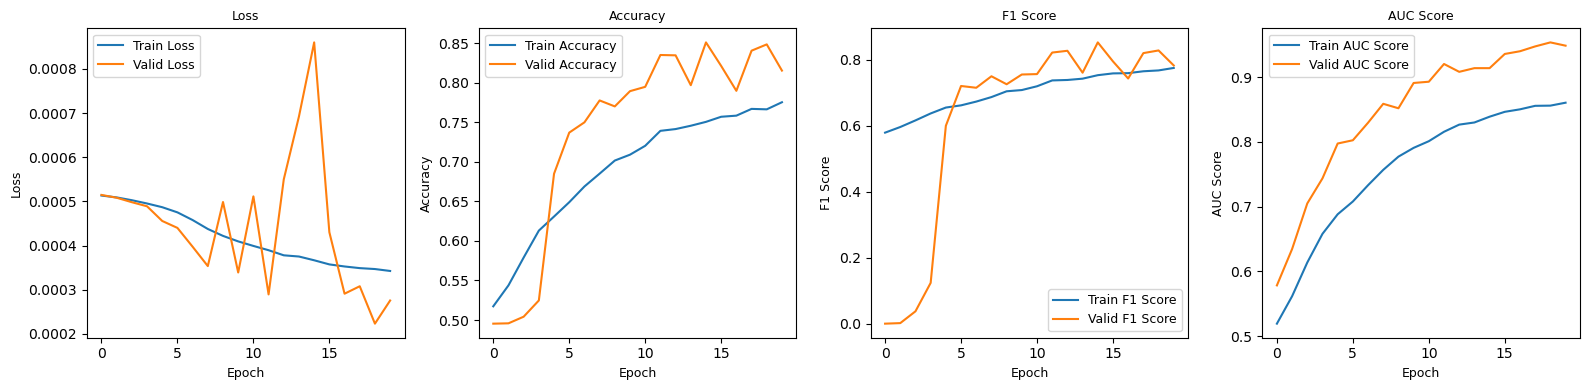

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB3Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [23]:
model = EfficientB3Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1181
           1       0.94      0.80      0.87      1203

    accuracy                           0.87      2384
   macro avg       0.88      0.87      0.87      2384
weighted avg       0.88      0.87      0.87      2384

Skin tone 1: Accuracy 0.8618307426597582
Skin tone 3: Accuracy 0.9149659863945578
Skin tone 0: Accuracy 0.8628099173553719
Skin tone 2: Accuracy 0.8545751633986928


In [24]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1171
           1       0.91      0.82      0.86      1177

    accuracy                           0.87      2348
   macro avg       0.87      0.87      0.87      2348
weighted avg       0.87      0.87      0.87      2348

Skin tone 1: Accuracy 0.8888888888888888
Skin tone 3: Accuracy 0.8904347826086957
Skin tone 2: Accuracy 0.8217821782178217
Skin tone 0: Accuracy 0.8784893267651889


# Resnet

In [25]:
model_name = "resnet"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/efficientnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.4954 | Loss: 0.0007 | F1: 0.0000 | AUC: 0.6343
Validation Accuracy: 0.5432 | Loss: 0.0006 | F1: 0.1855 | AUC: 0.7928
Validation Accuracy: 0.7676 | Loss: 0.0005 | F1: 0.7303 | AUC: 0.8700
Validation Accuracy: 0.7672 | Loss: 0.0004 | F1: 0.7090 | AUC: 0.9088
Validation Accuracy: 0.7278 | Loss: 0.0004 | F1: 0.6376 | AUC: 0.9273
Validation Accuracy: 0.8163 | Loss: 0.0004 | F1: 0.7870 | AUC: 0.9271
Validation Accuracy: 0.8414 | Loss: 0.0003 | F1: 0.8232 | AUC: 0.9417
Validation Accuracy: 0.8205 | Loss: 0.0004 | F1: 0.7994 | AUC: 0.9217
Validation Accuracy: 0.8461 | Loss: 0.0003 | F1: 0.8325 | AUC: 0.9379
Validation Accuracy: 0.7894 | Loss: 0.0004 | F1: 0.7420 | AUC: 0.9390
Validation Accuracy: 0.8272 | Loss: 0.0003 | F1: 0.7996 | AUC: 0.9488
Validation Accuracy: 0.8326 | Loss: 0.0003 | F1: 0.8121 | AUC: 0.9357
Validation Accuracy: 0.8591 | Loss: 0.0003 | F1: 0.8564 | AUC: 0.9404
Validation Accuracy: 0.8058 | Loss: 0.0005 | F1: 0.7695 | AUC: 0.9083
Validation Accuracy:

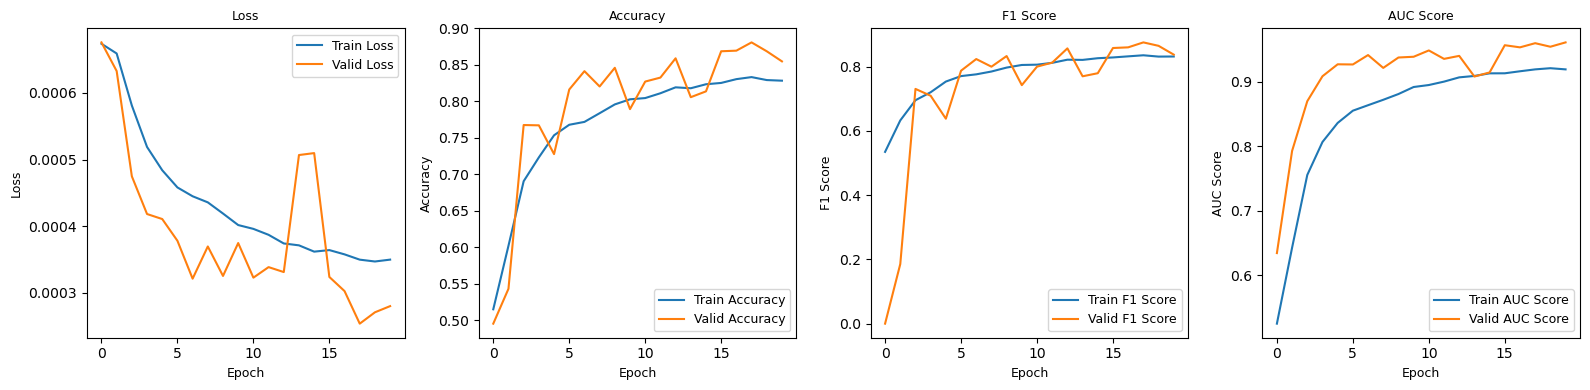

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [27]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1181
           1       0.89      0.88      0.88      1203

    accuracy                           0.88      2384
   macro avg       0.88      0.88      0.88      2384
weighted avg       0.88      0.88      0.88      2384

Skin tone 1: Accuracy 0.9067357512953368
Skin tone 3: Accuracy 0.9064625850340136
Skin tone 0: Accuracy 0.8677685950413223
Skin tone 2: Accuracy 0.8464052287581699


In [28]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1171
           1       0.89      0.90      0.89      1177

    accuracy                           0.89      2348
   macro avg       0.89      0.89      0.89      2348
weighted avg       0.89      0.89      0.89      2348

Skin tone 1: Accuracy 0.9193548387096774
Skin tone 3: Accuracy 0.92
Skin tone 2: Accuracy 0.8316831683168316
Skin tone 0: Accuracy 0.9014778325123153


# VGG

In [29]:
model_name = "vgg"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/efficientnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.7987 | Loss: 0.0007 | F1: 0.8086 | AUC: 0.8885
Validation Accuracy: 0.7945 | Loss: 0.0007 | F1: 0.8206 | AUC: 0.9268
Validation Accuracy: 0.8461 | Loss: 0.0005 | F1: 0.8302 | AUC: 0.9356
Validation Accuracy: 0.8482 | Loss: 0.0005 | F1: 0.8327 | AUC: 0.9368
Validation Accuracy: 0.7009 | Loss: 0.0007 | F1: 0.5813 | AUC: 0.9299
Validation Accuracy: 0.7957 | Loss: 0.0006 | F1: 0.7532 | AUC: 0.9336
Validation Accuracy: 0.8217 | Loss: 0.0007 | F1: 0.8290 | AUC: 0.9128
Validation Accuracy: 0.7706 | Loss: 0.0006 | F1: 0.7129 | AUC: 0.9310
Validation Accuracy: 0.7907 | Loss: 0.0006 | F1: 0.7494 | AUC: 0.9207
Validation Accuracy: 0.8498 | Loss: 0.0006 | F1: 0.8510 | AUC: 0.9219
Validation Accuracy: 0.8310 | Loss: 0.0006 | F1: 0.8286 | AUC: 0.9036
Validation Accuracy: 0.8335 | Loss: 0.0006 | F1: 0.8188 | AUC: 0.9211
Validation Accuracy: 0.8167 | Loss: 0.0006 | F1: 0.7976 | AUC: 0.9089
Validation Accuracy: 0.8314 | Loss: 0.0006 | F1: 0.8235 | AUC: 0.9148
Validation Accuracy:

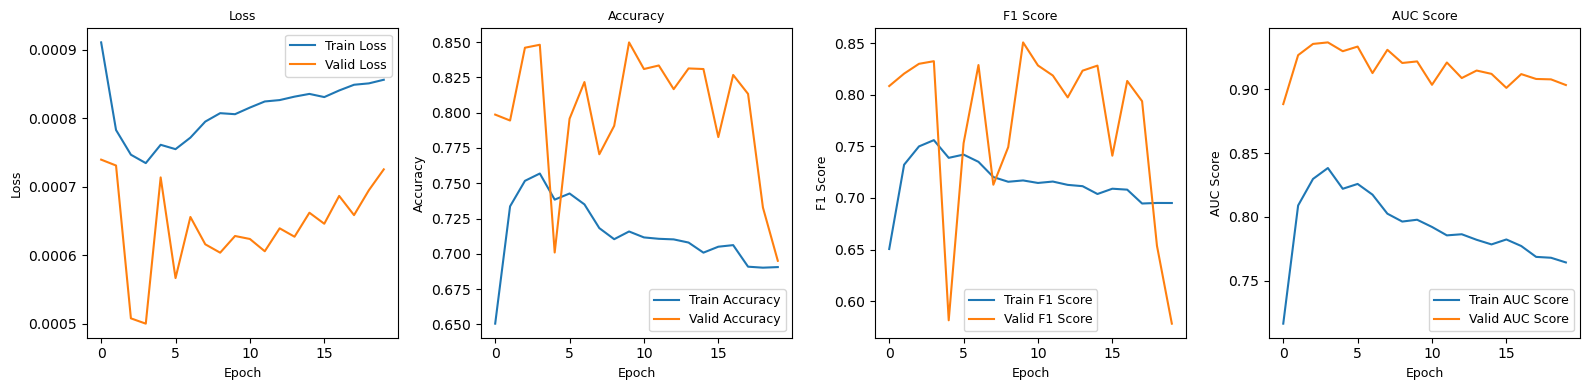

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [31]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1181
           1       0.90      0.83      0.86      1203

    accuracy                           0.86      2384
   macro avg       0.87      0.86      0.86      2384
weighted avg       0.87      0.86      0.86      2384

Skin tone 1: Accuracy 0.8618307426597582
Skin tone 3: Accuracy 0.9030612244897959
Skin tone 0: Accuracy 0.8628099173553719
Skin tone 2: Accuracy 0.8300653594771242


In [32]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1171
           1       0.89      0.83      0.86      1177

    accuracy                           0.86      2348
   macro avg       0.87      0.86      0.86      2348
weighted avg       0.87      0.86      0.86      2348

Skin tone 1: Accuracy 0.8763440860215054
Skin tone 3: Accuracy 0.88
Skin tone 2: Accuracy 0.8333333333333334
Skin tone 0: Accuracy 0.8686371100164204
